In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

df = pd.read_csv("data/allendale-students.csv")

In [10]:
df

distance  scholarship  parents  car     housing     major   debt
0          40         1532    0.440    6  off campus      STEM  26389
1          30         7479    0.265    7   on campus      STEM  21268
2         130         2664    0.115    3   on campus  business  32312
3         120         1998    0.325    9   on campus  business  28539
4          30         1462    0.105   10  off campus     other  34867
..        ...          ...      ...  ...         ...       ...    ...
195        30         5321    0.445    8  off campus      STEM  21873
196        50         5916    0.020   10  off campus      STEM  33122
197       410         5583    0.200    7   on campus  business  33666
198       320         1282    0.250    4  off campus  business  44262
199       110         7116    0.250    5  off campus      STEM  24411

[200 rows x 7 columns]

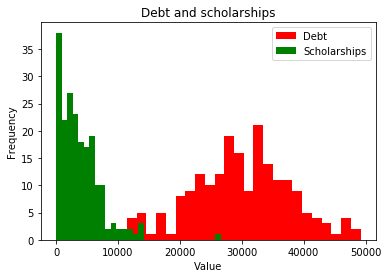

In [56]:
n_bins = 30
colors = ["red", "green"]
plt.hist(df.debt, bins=n_bins, color=colors[0])
plt.hist(df.scholarship, bins=n_bins, color=colors[1])
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title("Debt and scholarships")
labels= ["Debt","Scholarships"]
_ = plt.legend(labels)

In [44]:
df['scholarship_debt'] = df['debt']/ df['scholarship']

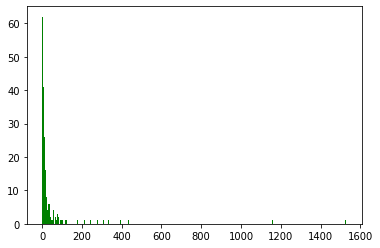

In [62]:
n_bins = 300
_ = plt.hist(df['scholarship_debt'], bins=n_bins, color=colors[1])


In [63]:

df['debt_sch_less_2'] = np.where(df['scholarship_debt'] < 2, "less", "greater")
df


distance  scholarship  parents  car     housing     major   debt  \
0          40         1532    0.440    6  off campus      STEM  26389   
1          30         7479    0.265    7   on campus      STEM  21268   
2         130         2664    0.115    3   on campus  business  32312   
3         120         1998    0.325    9   on campus  business  28539   
4          30         1462    0.105   10  off campus     other  34867   
..        ...          ...      ...  ...         ...       ...    ...   
195        30         5321    0.445    8  off campus      STEM  21873   
196        50         5916    0.020   10  off campus      STEM  33122   
197       410         5583    0.200    7   on campus  business  33666   
198       320         1282    0.250    4  off campus  business  44262   
199       110         7116    0.250    5  off campus      STEM  24411   

     scholarship_debt debt_sch_less_2  
0           17.225196         greater  
1            2.843696         greater  
2           12.129129         greater  
3           14.283784         greater  
4           23.848837         greater  
..                ...             ...  
195          4.110693         greater  
196          5.598715         greater  
197          6.030091         greater  
198         34.525741         greater  
199          3.430438         greater  

[200 rows x 9 columns]

In [86]:
df_with_dummies = pd.get_dummies(df).drop(columns=['housing_off campus', 'major_STEM']) 
df_with_dummies
# off-campus and stem majors are reference catgories

distance  scholarship  parents  car   debt  housing_on campus  \
0          40         1532    0.440    6  26389                  0   
1          30         7479    0.265    7  21268                  1   
2         130         2664    0.115    3  32312                  1   
3         120         1998    0.325    9  28539                  1   
4          30         1462    0.105   10  34867                  0   
..        ...          ...      ...  ...    ...                ...   
195        30         5321    0.445    8  21873                  0   
196        50         5916    0.020   10  33122                  0   
197       410         5583    0.200    7  33666                  1   
198       320         1282    0.250    4  44262                  0   
199       110         7116    0.250    5  24411                  0   

     major_business  major_other  
0                 0            0  
1                 0            0  
2                 1            0  
3                 1            0  
4                 0            1  
..              ...          ...  
195               0            0  
196               0            0  
197               1            0  
198               1            0  
199               0            0  

[200 rows x 8 columns]

In [85]:
from sklearn.linear_model import LinearRegression
from itertools import permutations 

In [87]:
predictors = df_with_dummies.drop(columns='debt')

In [137]:
cols = predictors.columns
output = []
for i in range(1, len(cols)):
    perm = permutations(cols[0:i])
    output.append(perm)

formula = []
for obj in list(output):
    for  perm in list(obj):
        formula.append(" + ".join(perm))
        

In [136]:
formula

['distance',
 'distance + scholarship',
 'scholarship + distance',
 'distance + scholarship + parents',
 'distance + parents + scholarship',
 'scholarship + distance + parents',
 'scholarship + parents + distance',
 'parents + distance + scholarship',
 'parents + scholarship + distance',
 'distance + scholarship + parents + car',
 'distance + scholarship + car + parents',
 'distance + parents + scholarship + car',
 'distance + parents + car + scholarship',
 'distance + car + scholarship + parents',
 'distance + car + parents + scholarship',
 'scholarship + distance + parents + car',
 'scholarship + distance + car + parents',
 'scholarship + parents + distance + car',
 'scholarship + parents + car + distance',
 'scholarship + car + distance + parents',
 'scholarship + car + parents + distance',
 'parents + distance + scholarship + car',
 'parents + distance + car + scholarship',
 'parents + scholarship + distance + car',
 'parents + scholarship + car + distance',
 'parents + car + dista

In [123]:
"+".join(['a', "b"])

'a+b'